## Retention Calculation

+ Customer Retention is a metric that measures the ability of a business to keep its existing customers over a specific period.
+ Retention is crucial because retaining existing customers is often more cost-effective than acquiring new ones.
+ High retention rates indicate customer satisfaction, loyalty, and a strong relationship between the business and its customers.

**Key Concepts:**

+ **Cohort Analysis:** Cohort analysis groups customers based on a common characteristic (e.g., the month they made their first purchase) and tracks these groups over time to see how many continue to make purchases. This helps in understanding customer behavior and the effectiveness of retention strategies.

+ **Retention Rate:** The retention rate is the percentage of customers retained by the end of a specific period compared to the number at the start of that period.

### SIMPLE RETENTION METHOD

In [31]:
import pandas as pd

In [32]:
## load the data
data = pd.read_csv('e_commerce_no_missing_values.csv')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   CustomerID   824364 non-null  int64  
 7   Country      824364 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 50.3+ MB


## Methods to Calculate Retention

There are several ways to calculate customer retention, depending on the specific business context and available data. Here are the most common methods:

#### Simple Retention Rate:

+ This is the basic calculation of the percentage of customers retained over a period.
+ Formula: `Retention Rate = (Number of Customers at End of Period − Number of New Customers Acquired during Period) / Number of Customers at Start of Period) × 100`

+ Use Case: This method is useful when you have distinct periods (like monthly or yearly) and you want to know how many customers stayed.

+ `Define the Periods`: We need to determine the number of unique customers at the start and end of a specific period (e.g., each month).
+ `Identify New Customers`: Identify the new customers acquired during each period.
+ `Calculate Retention Rate`: Use the Simple Retention Rate formula to calculate the retention rate for each period.

In [34]:
# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# Extract the year and month from 'InvoiceDate' for grouping
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')
# Identify the first purchase month for each customer
data['FirstPurchaseMonth'] = data.groupby('CustomerID')['YearMonth'].transform('min')

# Calculate the number of unique customers at the start and end of each period (month)
start_of_period = data[data['YearMonth'] == data['FirstPurchaseMonth']].groupby('YearMonth')['CustomerID'].nunique()
end_of_period = data.groupby('YearMonth')['CustomerID'].nunique()

# Calculate the number of new customers acquired during each period
new_customers = start_of_period.reindex(end_of_period.index, fill_value=0)

In [35]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,YearMonth,FirstPurchaseMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12,2009-12


In [36]:
print('Number of Start of the Period')
print(start_of_period)
print('Number of End of the Period')
print(end_of_period)
print('New customers acquired during each Period')
print(new_customers)

Number of Start of the Period
YearMonth
2009-12    1045
2010-01     394
2010-02     363
2010-03     436
2010-04     291
2010-05     254
2010-06     269
2010-07     183
2010-08     158
2010-09     242
2010-10     379
2010-11     322
2010-12      77
2011-01      71
2011-02     123
2011-03     178
2011-04     105
2011-05     108
2011-06     108
2011-07     102
2011-08     106
2011-09     187
2011-10     221
2011-11     192
2011-12      28
Freq: M, Name: CustomerID, dtype: int64
Number of End of the Period
YearMonth
2009-12    1045
2010-01     786
2010-02     807
2010-03    1111
2010-04     998
2010-05    1062
2010-06    1095
2010-07     988
2010-08     964
2010-09    1202
2010-10    1577
2010-11    1683
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Freq: M, Name: CustomerID, dtype: int64
New customers acquired during each Period


In [38]:
##  Calculate the Simple Retention Rate
retention_rate = ((end_of_period - new_customers) / start_of_period) * 100
print(retention_rate)

# Create a DataFrame to store retention data
retention_data = pd.DataFrame({
    'StartOfPeriod': start_of_period,
    'EndOfPeriod': end_of_period,
    'NewCustomers': new_customers,
    'RetentionRate': retention_rate
}).fillna(0)

retention_data.head(25)

YearMonth
2009-12       0.000000
2010-01      99.492386
2010-02     122.314050
2010-03     154.816514
2010-04     242.955326
2010-05     318.110236
2010-06     307.063197
2010-07     439.890710
2010-08     510.126582
2010-09     396.694215
2010-10     316.094987
2010-11     422.670807
2010-12    1131.168831
2011-01    1002.816901
2011-02     548.780488
2011-03     473.033708
2011-04     756.190476
2011-05     899.074074
2011-06     873.148148
2011-07     873.529412
2011-08     824.528302
2011-09     596.256684
2011-10     544.796380
2011-11     791.145833
2011-12    2350.000000
Freq: M, Name: CustomerID, dtype: float64


,StartOfPeriod,EndOfPeriod,NewCustomers,RetentionRate
YearMonth,,,,
2009-12,1045,1045,1045,0.000000
2010-01,394,786,394,99.492386
2010-02,363,807,363,122.314050
2010-03,436,1111,436,154.816514
2010-04,291,998,291,242.955326
2010-05,254,1062,254,318.110236
2010-06,269,1095,269,307.063197
2010-07,183,988,183,439.890710
2010-08,158,964,158,510.126582


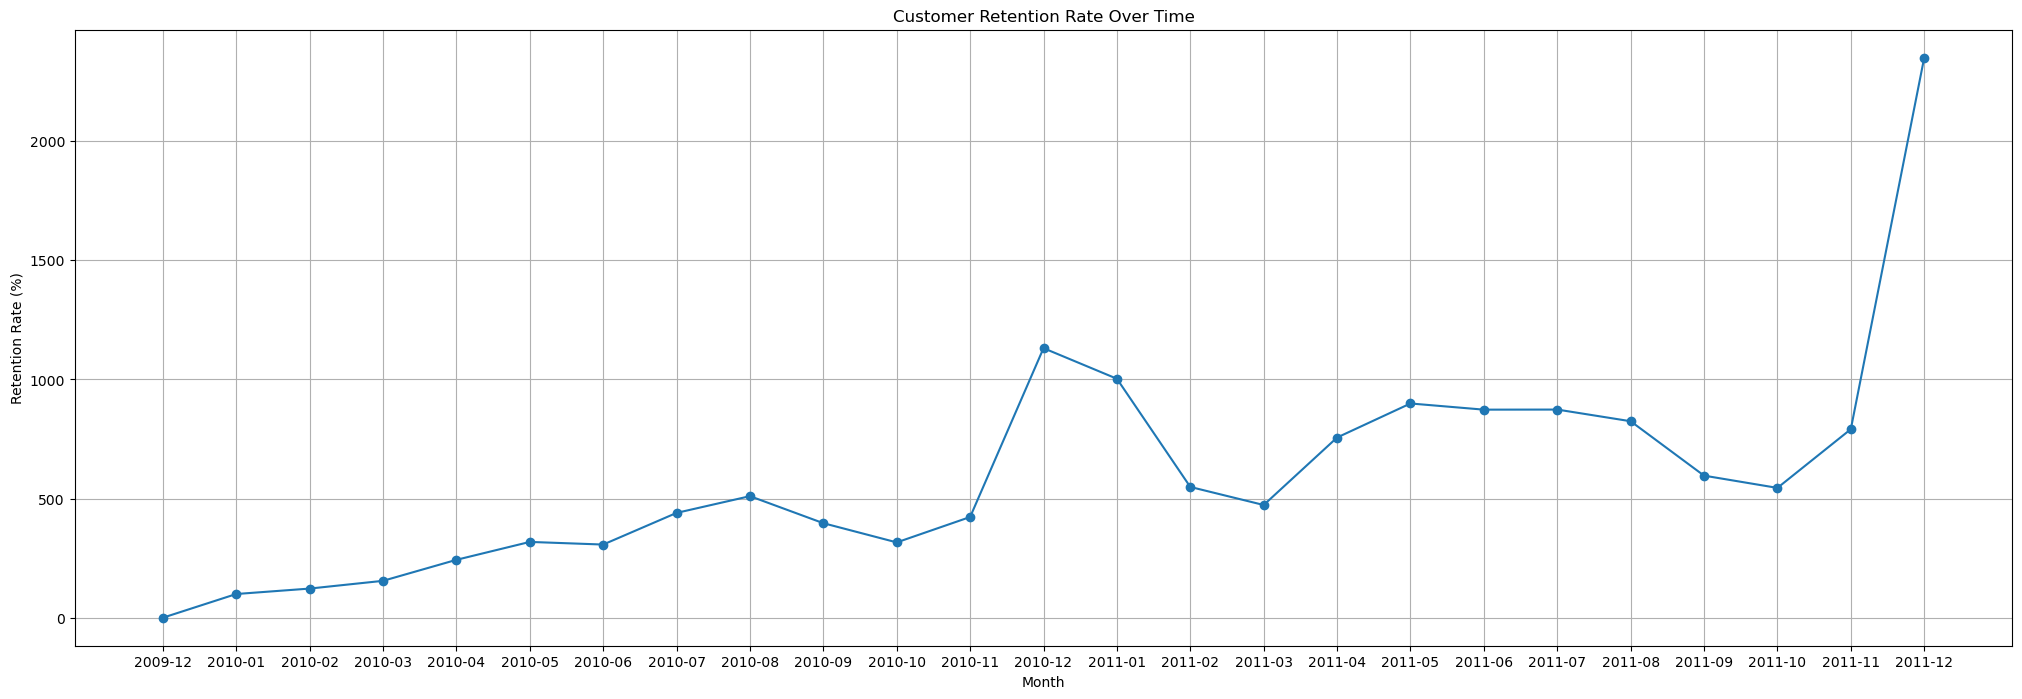

In [43]:
## visualize the retention rate

import matplotlib.pyplot as plt

plt.figure(figsize=(25, 8))
plt.plot(retention_data.index.astype(str), retention_data['RetentionRate'], marker='o', linestyle='-')
plt.title('Customer Retention Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.grid(True)
plt.show()

**Understanding the Columns:**

**StartOfPeriod:**

+ This represents the number of unique customers who made their first purchase during that specific month.
+ It is essentially the cohort size for each month.
+ For example, in December 2009 (2009-12), there were 1045 unique customers who made their first purchase.

**EndOfPeriod:**

+ This indicates the total number of unique customers who made at least one purchase in that month, regardless of when they were acquired.
+ For example, in January 2010 (2010-01), there were 786 unique customers who made a purchase.

**NewCustomers:**

+ This shows the number of customers who made their first purchase in that specific month (essentially the same as StartOfPeriod).
+ For example, in January 2010 (2010-01), there were 394 new customers who made their first purchase in that month.


**RetentionRate:**

`Retention Rate = ((EndOfPeriod - NewCustomers)/StartOfPeriod) * 100`

+ This rate represents the percentage of customers retained from the start of a given month to the end of that month.
+ The value over 100% indicates that more customers made a purchase at the end of the period than the number of customers who started at the beginning of the period.

**Key Insights:**
+ `High Retention Rates (>100%)`: When the retention rate is above 100%, it shows that there are more customers active at the end of the period than those who started as new customers. This usually means there is a combination of customer retention from previous periods and successful acquisition of new customers.
+ `Fluctuations in Retention Rates`: Some months show a significantly higher retention rate, such as December 2011 (2350%). This might indicate a period of heightened customer engagement or activity, such as seasonal sales or promotions.
Growth Over Time: The data suggests that the customer base grows over time, with a generally increasing trend in the EndOfPeriod numbers, indicating both retention and acquisition efforts are contributing to customer growth.

**Conclusion:**
The data reveals that customer retention is strong, with many months showing retention rates exceeding 100%. This suggests successful strategies in retaining and acquiring customers. However, fluctuations in retention rates should be analyzed further to identify patterns, such as the impact of marketing campaigns or seasonal effects.